+ need to add possible features that appear to have an effect on demographic
# less social factors for now
* Focus on NE us and look at 10 yr span
* maybe work with NE data 2019 again but look at different pollutants
* work with 3 year data for now of counties
* get all dataframes
# Importing libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [41]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]
RI, FL,GA, NC, SC = [44, 12, 13, 37, 45] # midatlantic
AL, KY, MS, TN, WV = [1, 21, 29, 47, 45] # south east
IL, IN, IA, KS, MI,MN = [17, 18, 19, 20, 26, 27] # mid_west


daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')

unemployment = pd.read_excel('../../data/raw/Unemployment.xls', header=None, sheet_name=0)

# Small area income and poverty estimates
saipe2017 = pd.read_excel('../../data/raw/saipe_economic/est17all.xls')
saipe2018 = pd.read_excel('../../data/raw/saipe_economic/est18all.xls')
saipe2019 = pd.read_excel('../../data/raw/saipe_economic/est19all.xls')

educ_vehicle_2017 = pd.read_csv('../../data/processed/acs1_edu_vehicle2017.csv')
educ_vehicle_2018 = pd.read_csv('../../data/processed/acs1_edu_vehicle2018.csv')
educ_vehicle_2019 = pd.read_csv('../../data/processed/acs1_edu_vehicle2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')


In [42]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Clean up Unemployment Data


In [43]:
display(unemployment)
unemployment2017_2019 = unemployment[4:]
unemployment2017_2019.reset_index(drop=True, inplace=True)
unemployment_header = unemployment2017_2019.iloc[0, :].values
unemployment2017_2019.columns = unemployment_header
unemployment2017_2019 = unemployment2017_2019.drop([0])
display(unemployment2017_2019)

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,Unemployment and median household income for t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3276,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3277,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3278,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
1,00000,US,United States,NaN,NaN,NaN,142601667,136904680,5696987,3.99504,...,161389026,155102319,6286707,3.89537,163100055,157115247,5984808,3.66941,65712,NaN
2,01000,AL,Alabama,NaN,NaN,NaN,2133223,2035594,97629,4.6,...,2216627,2130845,85782,3.9,2241747,2174483,67264,3,51771,100
3,01001,AL,"Autauga County, AL",2,2,1,21720,20846,874,4,...,26196,25261,935,3.6,26172,25458,714,2.7,58233,112.482
4,01003,AL,"Baldwin County, AL",3,2,1,69533,66971,2562,3.7,...,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115.646
5,01005,AL,"Barbour County, AL",6,6,0,11373,10748,625,5.5,...,8414,7987,427,5.1,8537,8213,324,3.8,35972,69.4829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3272,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3273,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3274,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


* fix header columns of csv file
* remove empty rows

In [44]:
# used to remove other year data to keep only 2017-2019
display(unemployment2017_2019.columns)
cols_to_remove = unemployment2017_2019.iloc[:, 3:74].columns
unemployment2017_2019 = remove_col(unemployment2017_2019, cols_to_remove)

unemployment_rates_2017_2019 = unemployment2017_2019.iloc[:, [1,2,6, 10, 14]]
display(unemployment_rates_2017_2019)

Index(['fips_txt', 'Stabr', 'area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001',
       'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002',
       'Unemployed_2002', 'Unemployment_rate_2002',
       'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003',
       'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004',
       'Unemployed_2004', 'Unemployment_rate_2004',
       'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005',
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006',
       'Unemployed_2006', 'Unemployment_rate_2006',
       'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007',
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008',
       'Unemploy

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
1,US,United States,4.35512,3.89537,3.66941
2,AL,Alabama,4.4,3.9,3
3,AL,"Autauga County, AL",3.9,3.6,2.7
4,AL,"Baldwin County, AL",4.1,3.6,2.7
5,AL,"Barbour County, AL",5.8,5.1,3.8
...,...,...,...,...,...
3271,PR,"Vega Baja Municipio, PR",12.4,10.4,9.6
3272,PR,"Vieques Municipio, PR",14.5,16.5,6.9
3273,PR,"Villalba Municipio, PR",19.4,15.8,15.9
3274,PR,"Yabucoa Municipio, PR",16.5,14.3,13.1


* remove all other column data for years 2000 - 2016
* make a df for only unemployment rates

In [45]:
# Retain only counties and not regions / individual state

UE_counties = unemployment_rates_2017_2019['area_name'].str.contains(',')
UE_county_rate = unemployment_rates_2017_2019.loc[UE_counties]

In [46]:
# check for missing values and dupes

display(UE_county_rate.isnull().sum())
display(UE_county_rate.loc[UE_county_rate.isnull().any(axis=1)])

daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Prince')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Skagway')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Wrangell')]

UE_county_rate.dropna(inplace=True)
UE_county_rate.reset_index(drop=True, inplace=True)

Stabr                     0
area_name                 0
Unemployment_rate_2017    3
Unemployment_rate_2018    3
Unemployment_rate_2019    3
dtype: int64

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
93,AK,"Prince of Wales-Outer Ketchikan Census Area, AK",NaN,NaN,NaN
96,AK,"Skagway-Hoonah-Angoon Census Area, AK",NaN,NaN,NaN
100,AK,"Wrangell-Petersburg Census Area, AK",NaN,NaN,NaN


<ipython-input-46-6b6aaf1a981a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate.dropna(inplace=True)


* 3 alaskan counties show unknown values;
* These values will not be mergeable with aqi data as it we do not aqi data on those areas
* drop these rows


In [47]:
# check if have any duplicate value
print(UE_county_rate['area_name'].duplicated().sum())

0


* we have 0 duplicates

In [48]:
display(UE_county_rate.info())

UE_county_rate['Unemployment_rate_2017'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2017'], downcast='float')
UE_county_rate['Unemployment_rate_2018'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2018'], downcast='float')
UE_county_rate['Unemployment_rate_2019'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2019'], downcast='float')

UE_county_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Stabr                   3218 non-null   object
 1   area_name               3218 non-null   object
 2   Unemployment_rate_2017  3218 non-null   object
 3   Unemployment_rate_2018  3218 non-null   object
 4   Unemployment_rate_2019  3218 non-null   object
dtypes: object(5)
memory usage: 125.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Stabr                   3218 non-null   object 
 1   area_name               3218 non-null   object 
 2   Unemployment_rate_2017  3218 non-null   float32
 3   Unemployment_rate_2018  3218 non-null   float32
 4   Unemployment_rate_2019  3218 non-null   float32
dtypes: flo

None

<ipython-input-48-0645ef7acb33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate['Unemployment_rate_2017'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2017'], downcast='float')
<ipython-input-48-0645ef7acb33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate['Unemployment_rate_2018'] = pd.to_numeric(UE_county_rate['Unemployment_rate_2018'], downcast='float')
<ipython-input-48-0645ef7acb33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

* convert Unemployment rate columsn to be type float


In [49]:
#order then plot top 100 and bottom 100
UE_county_rate
display(UE_county_rate.sort_values(by='Unemployment_rate_2017').head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2018').head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2019').head(10))

display(UE_county_rate.sort_values(by='Unemployment_rate_2017', ascending=False).head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2018', ascending=False).head(10))
display(UE_county_rate.sort_values(by='Unemployment_rate_2019', ascending=False).head(10))

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
292,CO,"Phillips County, CO",1.6,1.9,1.6
1999,ND,"Divide County, ND",1.6,1.3,1.4
307,CO,"Yuma County, CO",1.6,1.9,1.6
248,CO,"Baca County, CO",1.6,1.8,1.7
2033,ND,"Steele County, ND",1.7,2.0,2.1
276,CO,"Kit Carson County, CO",1.7,2.0,1.7
275,CO,"Kiowa County, CO",1.7,1.8,1.6
921,KS,"Greeley County, KS",1.8,2.0,2.3
273,CO,"Jackson County, CO",1.8,2.6,2.3
1998,ND,"Dickey County, ND",1.8,1.8,1.9


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
1999,ND,"Divide County, ND",1.6,1.3,1.4
2671,TX,"Loving County, TX",5.0,1.5,0.7
846,IA,"Lyon County, IA",1.8,1.6,1.6
2000,ND,"Dunn County, ND",2.2,1.6,1.6
2018,ND,"Mountrail County, ND",2.1,1.6,1.4
2014,ND,"McKenzie County, ND",2.5,1.7,1.6
871,IA,"Story County, IA",2.0,1.7,1.9
275,CO,"Kiowa County, CO",1.7,1.8,1.6
2676,TX,"McMullen County, TX",1.9,1.8,1.6
870,IA,"Sioux County, IA",2.0,1.8,1.9


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
2671,TX,"Loving County, TX",5.0,1.5,0.7
2018,ND,"Mountrail County, ND",2.1,1.6,1.4
1999,ND,"Divide County, ND",1.6,1.3,1.4
2676,TX,"McMullen County, TX",1.9,1.8,1.6
307,CO,"Yuma County, CO",1.6,1.9,1.6
253,CO,"Cheyenne County, CO",1.8,1.8,1.6
292,CO,"Phillips County, CO",1.6,1.9,1.6
2000,ND,"Dunn County, ND",2.2,1.6,1.6
2014,ND,"McKenzie County, ND",2.5,1.7,1.6
2623,TX,"Hartley County, TX",1.9,1.8,1.6


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
3182,PR,"Las Marias Municipio, PR",20.600000,14.100000,11.600000
3187,PR,"Maricao Municipio, PR",20.100000,15.100000,13.700000
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3180,PR,"Lajas Municipio, PR",19.400000,15.300000,12.800000
3202,PR,"Salinas Municipio, PR",18.700001,14.800000,14.500000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
110,AZ,"Yuma County, AZ",16.900000,16.700001,16.400000
3214,PR,"Vieques Municipio, PR",14.500000,16.500000,6.900000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000
3180,PR,"Lajas Municipio, PR",19.400000,15.300000,12.800000
3188,PR,"Maunabo Municipio, PR",17.299999,15.200000,15.100000


,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
81,AK,"Kusilvak Census Area, AK",19.600000,19.600000,19.299999
198,CA,"Imperial County, CA",19.500000,18.900000,18.299999
110,AZ,"Yuma County, AZ",16.900000,16.700001,16.400000
3215,PR,"Villalba Municipio, PR",19.400000,15.800000,15.900000
3195,PR,"Patillas Municipio, PR",19.700001,17.500000,15.700000
1430,MS,"Jefferson County, MS",14.600000,13.200000,15.500000
3140,PR,"Adjuntas Municipio, PR",15.100000,13.700000,15.300000
3188,PR,"Maunabo Municipio, PR",17.299999,15.200000,15.100000
3168,PR,"Guanica Municipio, PR",18.299999,15.500000,14.800000
3181,PR,"Lares Municipio, PR",18.600000,16.200001,14.700000


* Don't have consistent low unemployment by years
* Puerto Rico counties appear to have highest unemployment rate over time


No handles with labels found to put in legend.


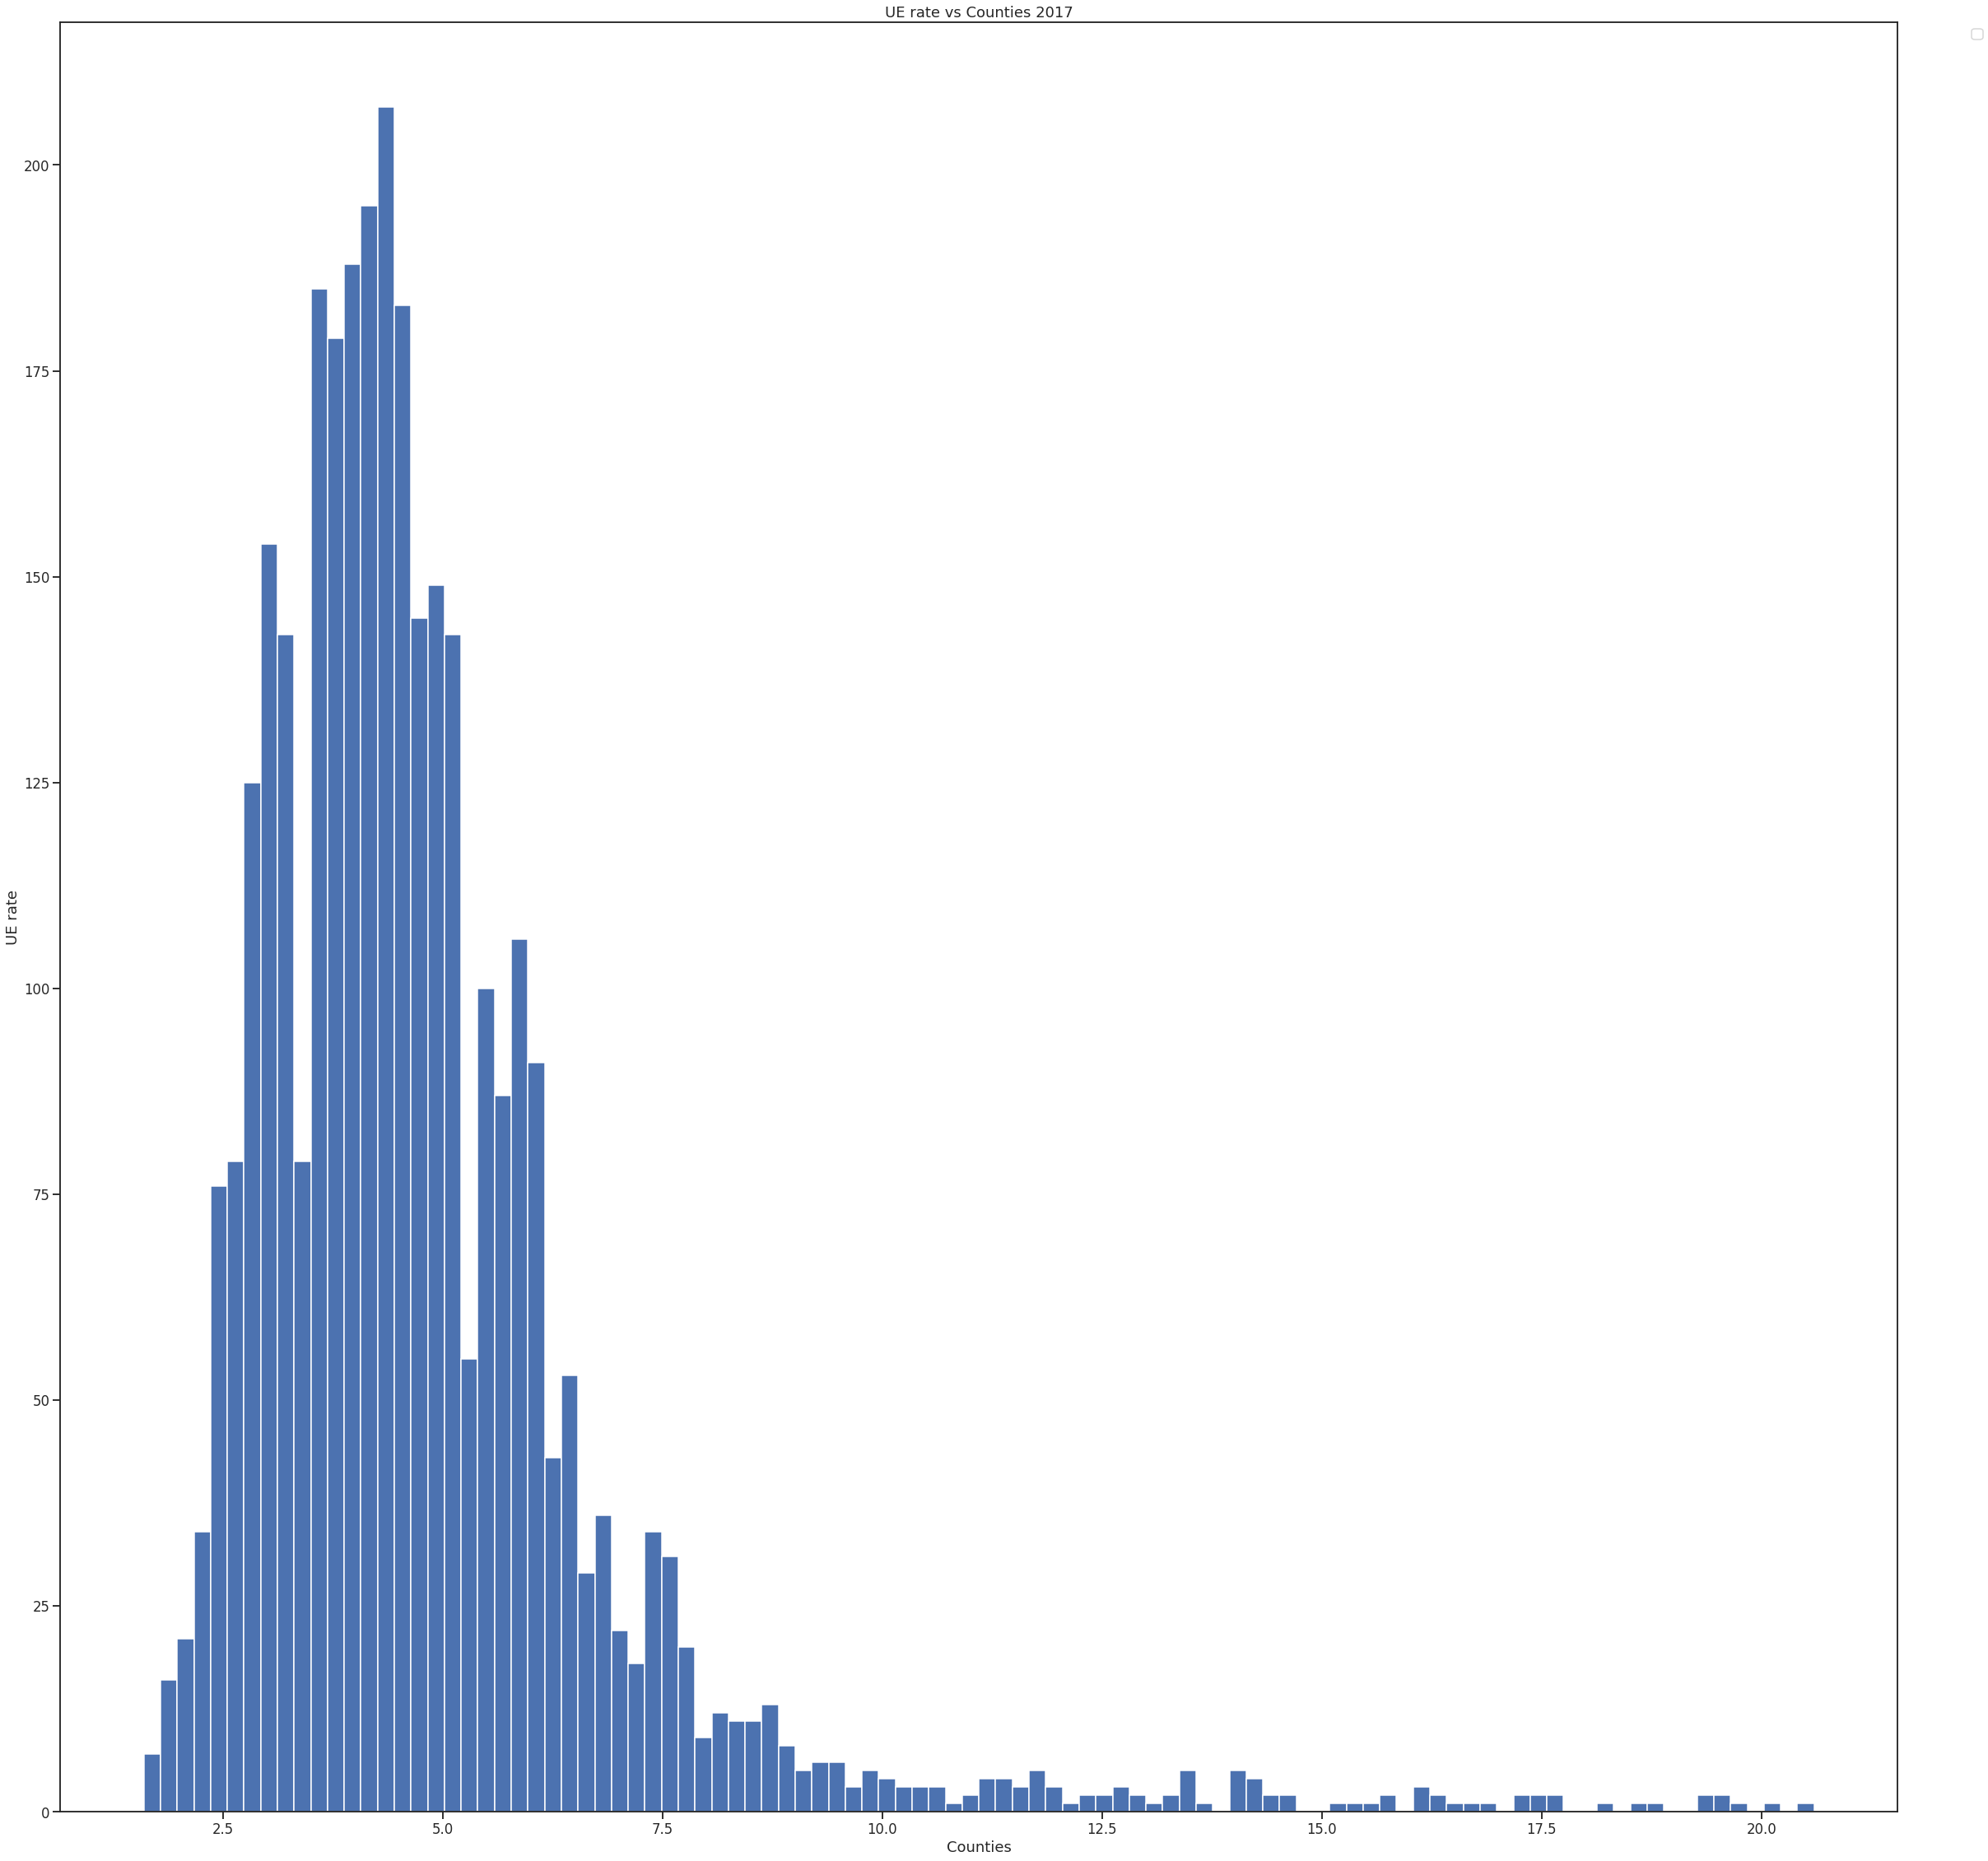

In [50]:
fig, ax = plt.subplots(figsize=(40,40))

plt.title('UE rate vs Counties 2017')
plt.xlabel('Counties')
plt.ylabel('UE rate')
# ax.scatter(UE_county_rate['area_name'], UE_county_rate['Unemployment_rate_2017'], label=sorted_UE_2017['area_name'])
ax.hist(UE_county_rate['Unemployment_rate_2017'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


* In 2017 it appears that Unemployment rates from 2.5 to 7.5 are normal
* data is skewed to right

# clean up saipe data 2017


In [51]:

saipe_header = saipe2017.iloc[2, :].values
saipe_header
saipe2017.columns = saipe_header
saipe2017.drop([0,1,2], inplace=True)
saipe2017.reset_index(drop=True, inplace=True)
display(saipe2017)

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,42583651,42342619,42824683,13.4,13.3,13.5,...,17.5,60336,60250,60422,3932969,3880645,3985293,20.2,19.9,20.5
1,01,000,AL,Alabama,802263,784517,820009,16.9,16.5,17.3,...,23.8,48193,47451,48935,78986,75009,82963,27.7,26.3,29.1
2,01,001,AL,Autauga County,7390,6147,8633,13.4,11.1,15.7,...,22.1,58343,52121,64565,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21199,17444,24954,10.1,8.3,11.9,...,17.9,56607,52439,60775,.,.,.,.,.,.
4,01,005,AL,Barbour County,7414,6325,8503,33.4,28.5,38.3,...,55,32490,29218,35762,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,4253,3540,4966,10,8.3,11.7,...,14,75590,69190,81990,.,.,.,.,.,.
3190,56,039,WY,Teton County,1348,1021,1675,5.8,4.4,7.2,...,7.9,90145,80434,99856,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2067,1623,2511,10.2,8,12.4,...,13.4,67404,60925,73883,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,632,1058,10.7,8,13.4,...,17.3,57989,53142,62836,.,.,.,.,.,.


In [52]:
saipe2017.columns
saipe2017.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2017['Name'].str.contains('County')
pov_rate_2017 = saipe2017.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2017.reset_index(drop=True, inplace=True)
display(pov_rate_2017)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,13.4
1,003,AL,Baldwin County,10.1
2,005,AL,Barbour County,33.4
3,007,AL,Bibb County,20.2
4,009,AL,Blount County,12.8
...,...,...,...,...
3002,037,WY,Sweetwater County,10
3003,039,WY,Teton County,5.8
3004,041,WY,Uinta County,10.2
3005,043,WY,Washakie County,10.7


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [53]:
print(pov_rate_2017.isnull().sum())
print(pov_rate_2017.duplicated().sum())
display(pov_rate_2017.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2017
* also convert poverty percent to float

In [54]:
pov_rate_2017.info()

pov_rate_2017.drop(518, inplace=True)
pov_rate_2017['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2017['Poverty Percent, All Ages'], downcast='float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s


No handles with labels found to put in legend.


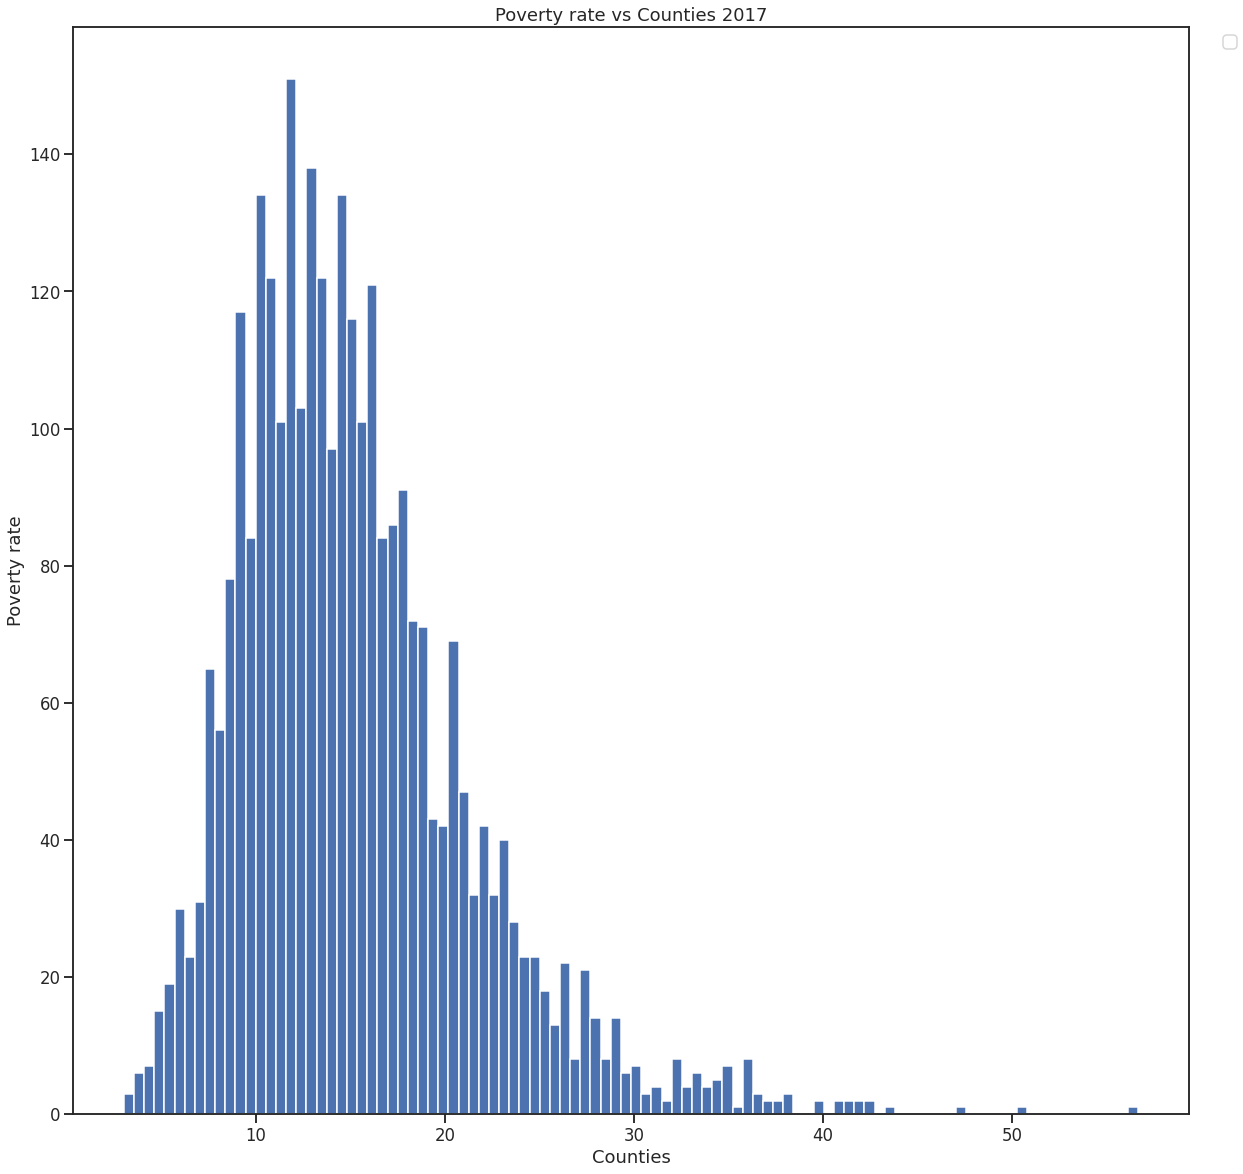

In [55]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2017')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2017['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


* poverty rates in 2017 US counties appear to be between 10 to 20


In [56]:
display(pov_rate_2017.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2017.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2775,107,VA,Loudoun County,3.0
233,035,CO,Douglas County,3.2
2305,083,SD,Lincoln County,3.5
1713,028,NM,Los Alamos County,3.7
695,057,IN,Hamilton County,3.8
1686,019,NJ,Hunterdon County,3.9
2424,187,TN,Williamson County,3.9
1288,139,MN,Scott County,4.0
1228,019,MN,Carver County,4.0
2694,029,UT,Morgan County,4.1


,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2330,137,SD,Ziebach County,56.700001
2324,121,SD,Todd County,50.400002
228,025,CO,Crowley County,47.400002
2272,017,SD,Buffalo County,43.299999
1316,021,MS,Claiborne County,42.599998
2279,031,SD,Corson County,42.400002
1347,083,MS,Leflore County,42.200001
988,051,KY,Clay County,41.700001
2315,102,SD,Oglala Lakota County,41.500000
1010,095,KY,Harlan County,41.500000


* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* Need to add Puerto Rico

# Repeat clean up steps on saipe data 2018


In [57]:
# clean up saipe data 2018

saipe_header = saipe2018.iloc[2, :].values
saipe_header
saipe2018.columns = saipe_header
saipe2018.drop([0,1,2], inplace=True)
saipe2018.reset_index(drop=True, inplace=True)
saipe2018

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,41852315,41619366,42085264,13.1,13,13.2,...,17.2,61937,61843,62031,3758704,3714862,3802546,19.5,19.3,19.7
1,01,000,AL,Alabama,801758,785668,817848,16.8,16.5,17.1,...,23.7,49881,49123,50639,73915,69990,77840,26,24.6,27.4
2,01,001,AL,Autauga County,7587,6334,8840,13.8,11.5,16.1,...,23.9,59338,53628,65048,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21069,17390,24748,9.8,8.1,11.5,...,16.9,57588,54437,60739,.,.,.,.,.,.
4,01,005,AL,Barbour County,6788,5662,7914,30.9,25.8,36,...,45.9,34382,31157,37607,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3540,2804,4276,8.4,6.7,10.1,...,11.2,73315,67141,79489,.,.,.,.,.,.
3190,56,039,WY,Teton County,1443,1137,1749,6.3,5,7.6,...,7.7,99087,88142,110032,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2010,1585,2435,10,7.9,12.1,...,14,63401,56812,69990,.,.,.,.,.,.
3192,56,043,WY,Washakie County,918,700,1136,11.9,9.1,14.7,...,19.3,55190,49263,61117,.,.,.,.,.,.


In [58]:
saipe2018.columns
saipe2018.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2018['Name'].str.contains('County')
pov_rate_2018 = saipe2018.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2018.reset_index(drop=True, inplace=True)
display(pov_rate_2018)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,13.8
1,003,AL,Baldwin County,9.8
2,005,AL,Barbour County,30.9
3,007,AL,Bibb County,21.8
4,009,AL,Blount County,13.2
...,...,...,...,...
3002,037,WY,Sweetwater County,8.4
3003,039,WY,Teton County,6.3
3004,041,WY,Uinta County,10
3005,043,WY,Washakie County,11.9


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [59]:
print(pov_rate_2018.isnull().sum())
print(pov_rate_2018.duplicated().sum())
display(pov_rate_2018.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2018
* also convert poverty percent to float

In [60]:
pov_rate_2018.drop(518, inplace=True)
pov_rate_2018['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2018['Poverty Percent, All Ages'], downcast='float')


* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s

No handles with labels found to put in legend.


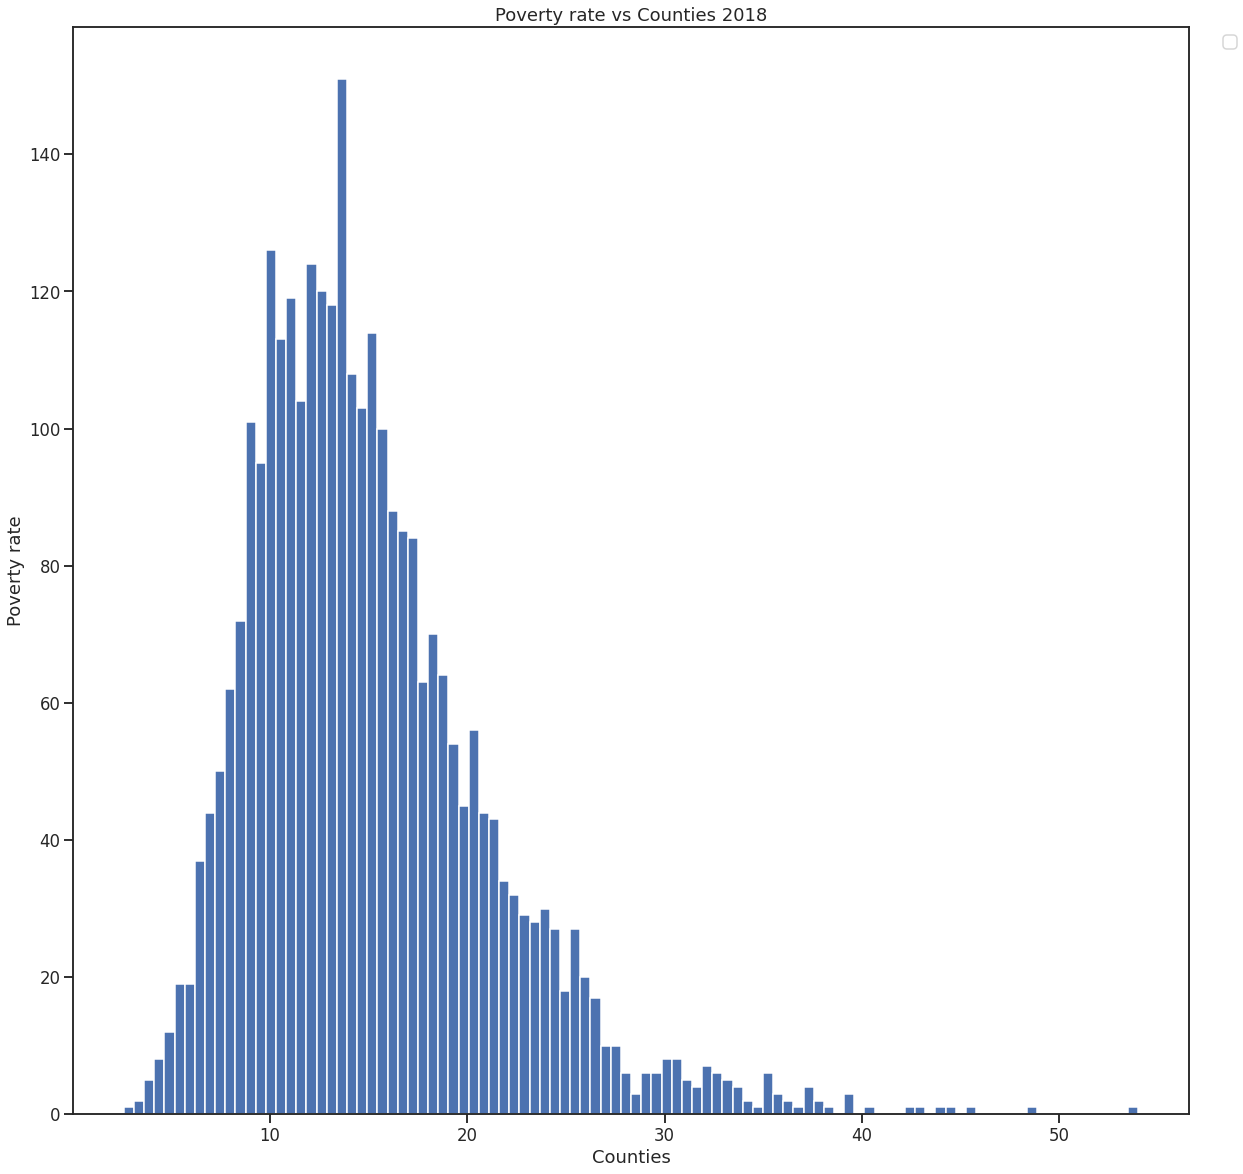

In [61]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2018')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2018['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [62]:
display(pov_rate_2018.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2018.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
233,035,CO,Douglas County,2.6
2576,301,TX,Loving County,3.3
2775,107,VA,Loudoun County,3.6
2424,187,TN,Williamson County,3.8
1228,019,MN,Carver County,3.8
1713,028,NM,Los Alamos County,3.9
2694,029,UT,Morgan County,4.0
1966,041,OH,Delaware County,4.1
611,093,IL,Kendall County,4.2
2957,089,WI,Ozaukee County,4.2


,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
2315,102,SD,Oglala Lakota County,54.000000
2324,121,SD,Todd County,48.400002
2272,017,SD,Buffalo County,45.700001
228,025,CO,Crowley County,44.299999
2330,137,SD,Ziebach County,43.900002
120,077,AR,Lee County,43.000000
5,011,AL,Bullock County,42.500000
1333,055,MS,Issaquena County,40.500000
509,309,GA,Wheeler County,39.599998
1057,189,KY,Owsley County,39.200001


* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* But poverty ranking appear to be same from 2017

# Repeat clean up steps for saipe data 2019

In [63]:

saipe_header = saipe2019.iloc[2, :].values
saipe_header
saipe2019.columns = saipe_header
saipe2019.drop([0,1,2], inplace=True)
saipe2019.reset_index(drop=True, inplace=True)
saipe2019

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,39490096,39248096,39732096,12.3,12.2,12.4,...,16,65712,65594,65830,3457689,3405854,3509524,18.2,17.9,18.5
1,01,000,AL,Alabama,747478,730491,764465,15.6,15.2,16,...,21.6,51771,51179,52363,69236,65296,73176,24.2,22.8,25.6
2,01,001,AL,Autauga County,6723,5517,7929,12.1,9.9,14.3,...,19.4,58233,52517,63949,.,.,.,.,.,.
3,01,003,AL,Baldwin County,22360,18541,26179,10.1,8.4,11.8,...,17.2,59871,54593,65149,.,.,.,.,.,.
4,01,005,AL,Barbour County,5909,4787,7031,27.1,22,32.2,...,49,35972,31822,40122,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3453,2743,4163,8.3,6.6,10,...,11.1,80639,73437,87841,.,.,.,.,.,.
3190,56,039,WY,Teton County,1396,1073,1719,6,4.6,7.4,...,6.7,98837,86531,111143,.,.,.,.,.,.
3191,56,041,WY,Uinta County,1699,1264,2134,8.5,6.3,10.7,...,11.1,70756,63191,78321,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,626,1064,11.1,8.2,14,...,17.4,55122,50050,60194,.,.,.,.,.,.


In [64]:
saipe2019.columns
saipe2019.iloc[:, [1,2,3,4,7]]
saipe_county = saipe2019['Name'].str.contains('County')
pov_rate_2019 = saipe2019.loc[saipe_county].iloc[:, [1,2,3, 7]]
pov_rate_2019.reset_index(drop=True, inplace=True)
display(pov_rate_2019)

,County FIPS Code,Postal Code,Name,"Poverty Percent, All Ages"
0,001,AL,Autauga County,12.1
1,003,AL,Baldwin County,10.1
2,005,AL,Barbour County,27.1
3,007,AL,Bibb County,20.3
4,009,AL,Blount County,16.3
...,...,...,...,...
3002,037,WY,Sweetwater County,8.3
3003,039,WY,Teton County,6
3004,041,WY,Uinta County,8.5
3005,043,WY,Washakie County,11.1


* Remove empty cells and clean up columns
* Retain only US county information and poverty rates for all ages


In [65]:
print(pov_rate_2019.isnull().sum())
print(pov_rate_2019.duplicated().sum())
display(pov_rate_2019.info())

County FIPS Code             0
Postal Code                  0
Name                         0
Poverty Percent, All Ages    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   County FIPS Code           3007 non-null   object
 1   Postal Code                3007 non-null   object
 2   Name                       3007 non-null   object
 3   Poverty Percent, All Ages  3007 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


None

* No duplicates or missing values for poverty rates in 2018
* also convert poverty percent to float

In [66]:
pov_rate_2019.drop(518)

pov_rate_2019['Poverty Percent, All Ages'] = pd.to_numeric(pov_rate_2019['Poverty Percent, All Ages'], downcast='float')


ValueError: Unable to parse string "." at position 518

* from further inspection it was noted that Kalawao county is now excluded in their survey results starting 2017
* Kalawao county records removed
* Poverty rates in Hawaii appear to around 10-20s

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

plt.title('Poverty rate vs Counties 2019')
plt.xlabel('Counties')
plt.ylabel('Poverty rate')
ax.hist(pov_rate_2019['Poverty Percent, All Ages'], bins=100)
ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [ ]:
display(pov_rate_2019.sort_values(by='Poverty Percent, All Ages').head(10))
display(pov_rate_2019.sort_values(by='Poverty Percent, All Ages', ascending=False).head(10))

* Puerto Rico is not found and that is because poverty county data for Puerto Rico is in a separate set
* Need to add Puerto Rico
* But poverty ranking appear to be same from 2017-2019

In [ ]:
annual_aqi_by_county_2019 = pd.read_csv('../../data/raw/annual_aqi_by_county_2019.csv')

# Clean education and vehicle 2017 dataset

In [73]:
educ_vehicle_2017.shape
educ_vehicle_2017.columns

educ_vehicle_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        837 non-null    int64  
 1   NAME              837 non-null    object 
 2   state             837 non-null    int64  
 3   county            837 non-null    int64  
 4   EDU_TOT           826 non-null    float64
 5   LESS_HS_TOT       826 non-null    float64
 6   HS_TOT            826 non-null    float64
 7   COL_OR_ASSOC_TOT  826 non-null    float64
 8   BACH_TOT          826 non-null    float64
 9   GRAD_TOT          826 non-null    float64
 10  VEHICLE_TOT       837 non-null    int64  
 11  WALK_TOT          226 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 78.6+ KB


* Have 837 rows and 12 columns
* Category types are appropriate for numerical and nominal columns

In [92]:
# educ_vehicle_2017.drop('Unnamed: 0', axis=1, inplace=True)
educ_vehicle_2017['WALK_TOT'].unique()
educ_vehicle_2017['WALK_TOT'].isnull().sum()

#drop walk b/c too many missing values and only retain counties and drop also drop that row index column
educ_vehicle_2017.state.unique()
cols_to_remove = ['Unnamed: 0', 'WALK_TOT']
educ_vehicle_2017 = remove_col(educ_vehicle_2017, cols_to_remove)

* drop first column as it is just an index column
* drop total walk column as majority of data is missing
* nb there is no fips state code for 4

In [97]:
educ_vehicle_2017.NAME.duplicated().sum()
educ_vehicle_2017.isnull().sum()
educ_vehicle_2017.loc[educ_vehicle_2017.isnull().any(axis=1)]
educ_vehicle_2017.loc[educ_vehicle_2017.NAME.str.contains('Puerto')]

,NAME,state,county,EDU_TOT,LESS_HS_TOT,HS_TOT,COL_OR_ASSOC_TOT,BACH_TOT,GRAD_TOT,VEHICLE_TOT
477,"Arecibo Municipio, Puerto Rico",72,13,NaN,NaN,NaN,NaN,NaN,NaN,21075
478,"Bayamón Municipio, Puerto Rico",72,21,NaN,NaN,NaN,NaN,NaN,NaN,46000
479,"Caguas Municipio, Puerto Rico",72,25,NaN,NaN,NaN,NaN,NaN,NaN,36045
480,"Carolina Municipio, Puerto Rico",72,31,NaN,NaN,NaN,NaN,NaN,NaN,52510
481,"Guaynabo Municipio, Puerto Rico",72,61,NaN,NaN,NaN,NaN,NaN,NaN,25965
482,"Mayagüez Municipio, Puerto Rico",72,97,NaN,NaN,NaN,NaN,NaN,NaN,15815
483,"Ponce Municipio, Puerto Rico",72,113,NaN,NaN,NaN,NaN,NaN,NaN,32020
484,"San Juan Municipio, Puerto Rico",72,127,NaN,NaN,NaN,NaN,NaN,NaN,95110
485,"Toa Alta Municipio, Puerto Rico",72,135,NaN,NaN,NaN,NaN,NaN,NaN,21330
486,"Toa Baja Municipio, Puerto Rico",72,137,NaN,NaN,NaN,NaN,NaN,NaN,24670


* All Missing values are Puerto Rico counties similar to previous data sets
* Census Bureau keeps Puerto Rico as separate data column for education
* No duplicated data shown

In [102]:
educ_vehicle_2017.columns.values[3:]
educ_vehicle_2017

,NAME,state,county,EDU_TOT,LESS_HS_TOT,HS_TOT,COL_OR_ASSOC_TOT,BACH_TOT,GRAD_TOT,VEHICLE_TOT
0,"Lonoke County, Arkansas",5,85,48062.0,4635.0,16988.0,15189.0,8449.0,2801.0,29680
1,"Pulaski County, Arkansas",5,119,267664.0,23707.0,72820.0,78174.0,54548.0,38415.0,158710
2,"Saline County, Arkansas",5,125,82486.0,6720.0,24894.0,29688.0,13658.0,7526.0,51700
3,"Sebastian County, Arkansas",5,131,85038.0,13936.0,25800.0,26884.0,12153.0,6265.0,49530
4,"Washington County, Arkansas",5,143,140005.0,22986.0,33975.0,37146.0,28448.0,17450.0,95620
...,...,...,...,...,...,...,...,...,...,...
832,"Benton County, Arkansas",5,7,174196.0,18818.0,50892.0,45337.0,40418.0,18731.0,116180
833,"Craighead County, Arkansas",5,31,69331.0,7487.0,23907.0,18864.0,11697.0,7376.0,46130
834,"Faulkner County, Arkansas",5,45,75973.0,5844.0,23724.0,21483.0,15159.0,9763.0,52710
835,"Garland County, Arkansas",5,51,71435.0,8288.0,21913.0,27302.0,9090.0,4842.0,32980


In [99]:
for dem in demographic:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(' mean AQI vs ' + dem)
    plt.xlabel('Dem ratio')
    plt.ylabel('Mean AQI')
    ax.scatter(EAST_MID_WEST_avg_aqi_dem_2017_2019[dem], EAST_MID_WEST_avg_aqi_dem_2017_2019['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

0

In [ ]:
print(daily_aqi_by_county_2019.columns)

print(annual_aqi_by_county_2019.columns)
annual_aqi_by_county_2019.head()
# annual_aqi_by_county_2019.shape
annual_aqi_by_county_2019['Days with AQI'].min()

print(annual_aqi_by_county_2019.isna().sum())
annual_aqi_by_county_2019.head()
annual_aqi_by_county_2019.shape
len(annual_aqi_by_county_2019.County)

In [ ]:
PR = annual_aqi_by_county_2019.State == 'Puerto Rico'
annual_aqi_by_county_2019.loc[PR]

In [ ]:
hazard = annual_aqi_by_county_2019['Hazardous Days'] != 0

annual_aqi_by_county_2019.loc[hazard]

* seems that pm5 and pm10 are common for days where aqi is above average